In [254]:
# Importer les librairies à utiliser

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import mutual_info_regression,SelectKBest
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

from sklearn.metrics import mean_squared_error


In [4]:
data=pd.read_csv('train.csv')
data.head()

,BCT_CODBUR,CTR_MATFIS,CTR_CATEGO_X,FJU_CODFJU,CTR_CESSAT,ACT_CODACT,CTR_OBLDIR,CTR_OBLACP,CTR_OBLRES,CTR_OBLFOP,...,target,FAC_MNTPRI_F,FAC_MFODEC_F,FAC_MNTDCO_F,FAC_MNTTVA_F,FAC_MNTPRI_C,FAC_MFODEC_C,FAC_MNTDCO_C,FAC_MNTTVA_C,id
0,44,6210,C,99,0,3707,4,2,2,2,...,16.639203,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,train_id17437
1,401,14383,M,22,0,6105,4,2,2,2,...,17.827703,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,train_id5086
2,243,11555,M,23,0,5751,4,2,2,2,...,15.473503,25387000.0,0.0,0.0,4571280.0,NaN,NaN,NaN,NaN,train_id1443
3,72,6175,C,99,0,4402,4,2,2,2,...,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,train_id15469
4,42,1417,M,23,0,6302,4,2,2,2,...,14.286244,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,train_id14368


In [5]:
# Informations sur la base de données
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21295 entries, 0 to 21294
Columns: 121 entries, BCT_CODBUR to id
dtypes: float64(103), int64(16), object(2)
memory usage: 19.7+ MB


In [6]:
data.describe()

,BCT_CODBUR,CTR_MATFIS,FJU_CODFJU,CTR_CESSAT,ACT_CODACT,CTR_OBLDIR,CTR_OBLACP,CTR_OBLRES,CTR_OBLFOP,CTR_OBLTFP,...,RES_ANNIMP,target,FAC_MNTPRI_F,FAC_MFODEC_F,FAC_MNTDCO_F,FAC_MNTTVA_F,FAC_MNTPRI_C,FAC_MFODEC_C,FAC_MNTDCO_C,FAC_MNTTVA_C
count,21295.000000,21295.000000,21295.000000,21295.000000,21295.000000,21295.000000,21295.000000,21295.000000,21295.000000,21295.000000,...,21295.000000,21295.000000,1.820000e+03,1.820000e+03,1.820000e+03,1.820000e+03,2.113000e+03,2.113000e+03,2.113000e+03,2.113000e+03
mean,214.935807,7797.448697,59.580888,0.048509,4821.595445,4.454191,1.959850,1.977319,1.928105,1.949096,...,2014.508852,11.780084,9.471275e+09,6.632605e+06,9.306873e+04,4.903870e+08,8.420356e+08,1.489097e+06,3.191820e+04,1.386915e+08
std,162.992837,4484.430937,38.542427,0.228200,1168.628546,1.205500,0.196316,0.154462,0.263361,0.221933,...,1.332947,7.085772,1.297572e+11,2.091579e+08,3.596381e+06,4.739676e+09,4.107717e+09,1.733094e+07,7.106121e+05,7.148914e+08
min,9.000000,1.000000,10.000000,0.000000,1002.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,2013.000000,0.000000,2.173000e+04,0.000000e+00,0.000000e+00,0.000000e+00,4.910000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,92.000000,3944.000000,22.000000,0.000000,4203.000000,4.000000,2.000000,2.000000,2.000000,2.000000,...,2013.000000,0.000000,3.024577e+07,0.000000e+00,0.000000e+00,4.360140e+06,1.906574e+07,0.000000e+00,0.000000e+00,2.927028e+06
50%,182.000000,7817.000000,23.000000,0.000000,4417.000000,4.000000,2.000000,2.000000,2.000000,2.000000,...,2014.000000,14.981121,1.997162e+08,0.000000e+00,0.000000e+00,2.989651e+07,5.594731e+07,0.000000e+00,0.000000e+00,8.642968e+06
75%,254.000000,11695.500000,99.000000,0.000000,6102.000000,4.000000,2.000000,2.000000,2.000000,2.000000,...,2015.000000,16.625623,9.257110e+08,0.000000e+00,0.000000e+00,1.426512e+08,2.707424e+08,0.000000e+00,0.000000e+00,4.414594e+07
max,700.000000,15603.000000,99.000000,2.000000,8999.000000,9.000000,2.000000,5.000000,5.000000,3.000000,...,2018.000000,23.591334,3.414507e+12,8.897885e+09,1.529912e+08,1.608777e+11,8.351128e+10,4.044067e+08,2.614500e+07,1.352152e+10


In [7]:
# Identifions le nombre de ligne et le nombre de colones de la base de données.
data.shape
#La base de données contient:
#Lignes: 21295
#Colones :121

(21295, 121)

In [8]:
# Identifions les types des variables dans la base de données
data.dtypes

BCT_CODBUR        int64
CTR_MATFIS        int64
CTR_CATEGO_X     object
FJU_CODFJU        int64
CTR_CESSAT        int64
                 ...   
FAC_MNTPRI_C    float64
FAC_MFODEC_C    float64
FAC_MNTDCO_C    float64
FAC_MNTTVA_C    float64
id               object
Length: 121, dtype: object

In [9]:
data.dtypes.value_counts()

float64    103
int64       16
object       2
dtype: int64

In [10]:
# Identifions les valeurs manquantes
data.isna().sum()

BCT_CODBUR          0
CTR_MATFIS          0
CTR_CATEGO_X        0
FJU_CODFJU          0
CTR_CESSAT          0
                ...  
FAC_MNTPRI_C    19182
FAC_MFODEC_C    19182
FAC_MNTDCO_C    19182
FAC_MNTTVA_C    19182
id                  0
Length: 121, dtype: int64

<AxesSubplot:>

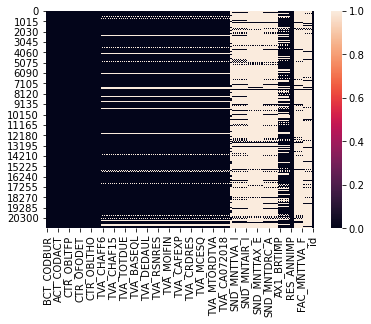

In [11]:
# Visualisons graphiquement l'ensemble de valeurs manquantes
sns.heatmap(data.isna())

In [34]:
# df=pd.DataFrame()
# for i in data :
#     if (data[i].isna().sum()>= 10000):
#         dfr=data.drop([i],axis=1)
#         df=df.append(dfr)
df=pd.DataFrame()
for i in data :
    if (data[i].isna().sum()< 10000):
        df=df.append(data[i])
    else:
        print("donnees manquante")

donnees manquante
donnees manquante
donnees manquante
donnees manquante
donnees manquante
donnees manquante
donnees manquante
donnees manquante
donnees manquante
donnees manquante
donnees manquante
donnees manquante
donnees manquante
donnees manquante
donnees manquante
donnees manquante
donnees manquante
donnees manquante
donnees manquante
donnees manquante
donnees manquante
donnees manquante
donnees manquante
donnees manquante
donnees manquante
donnees manquante
donnees manquante
donnees manquante
donnees manquante
donnees manquante


In [39]:
df=df.transpose()
df.head()

,BCT_CODBUR,CTR_MATFIS,CTR_CATEGO_X,FJU_CODFJU,CTR_CESSAT,ACT_CODACT,CTR_OBLDIR,CTR_OBLACP,CTR_OBLRES,CTR_OBLFOP,...,TVA_CA132018,TVA_CA192018,AX1_BRTIMP,AX2_HONORA,AX2_LOYERS,AX3_REVCAP,AX5_MNTMAR,RES_ANNIMP,target,id
0,44.0,6210.0,C,99,0,3707,4,2,2,2,...,0.0,0.0,0.0,2950000.0,0.0,0.0,602769328.0,2014,16.639203,train_id17437
1,401.0,14383.0,M,22,0,6105,4,2,2,2,...,0.0,0.0,0.0,203353885.0,0.0,0.0,14785200.0,2013,17.827703,train_id5086
2,243.0,11555.0,M,23,0,5751,4,2,2,2,...,0.0,0.0,0.0,0.0,0.0,0.0,10792800.0,2013,15.473503,train_id1443
3,72.0,6175.0,C,99,0,4402,4,2,2,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2017,0.0,train_id15469
4,42.0,1417.0,M,23,0,6302,4,2,2,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2014,14.286244,train_id14368


In [42]:
df.shape

(21295, 91)

<AxesSubplot:>

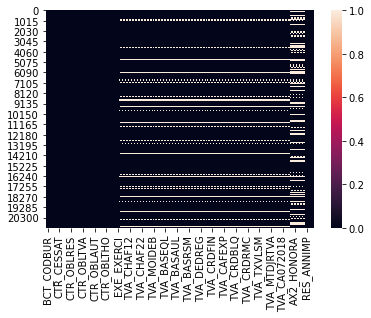

In [43]:
sns.heatmap(df.isna())

In [44]:
df=df.dropna(axis=0)

<AxesSubplot:>

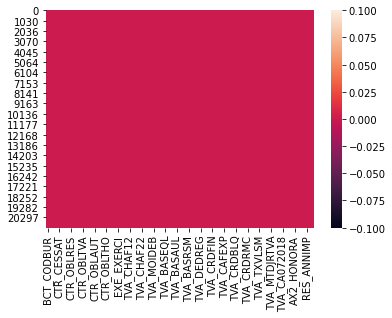

In [45]:
sns.heatmap(df.isna())

In [46]:
df.shape

(15151, 91)

In [52]:
df.dtypes.value_counts()

object    91
dtype: int64

In [54]:
df.head()

,BCT_CODBUR,CTR_MATFIS,CTR_CATEGO_X,FJU_CODFJU,CTR_CESSAT,ACT_CODACT,CTR_OBLDIR,CTR_OBLACP,CTR_OBLRES,CTR_OBLFOP,...,TVA_CA132018,TVA_CA192018,AX1_BRTIMP,AX2_HONORA,AX2_LOYERS,AX3_REVCAP,AX5_MNTMAR,RES_ANNIMP,target,id
0,44.0,6210.0,C,99,0,3707,4,2,2,2,...,0.0,0.0,0.0,2950000.0,0.0,0.0,602769328.0,2014,16.639203,train_id17437
1,401.0,14383.0,M,22,0,6105,4,2,2,2,...,0.0,0.0,0.0,203353885.0,0.0,0.0,14785200.0,2013,17.827703,train_id5086
2,243.0,11555.0,M,23,0,5751,4,2,2,2,...,0.0,0.0,0.0,0.0,0.0,0.0,10792800.0,2013,15.473503,train_id1443
3,72.0,6175.0,C,99,0,4402,4,2,2,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2017,0.0,train_id15469
4,42.0,1417.0,M,23,0,6302,4,2,2,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2014,14.286244,train_id14368


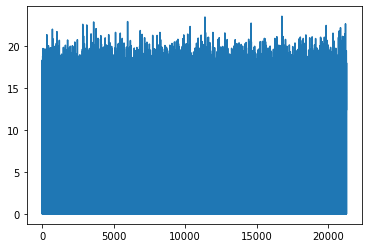

In [138]:
plt.plot(df['target'])

C:\Users\NEUMAN\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='target', ylabel='Density'>

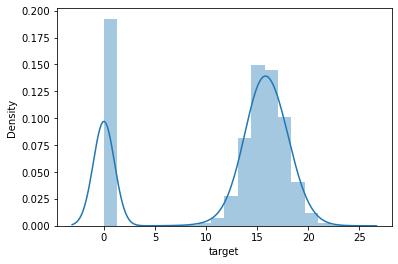

In [137]:
sns.distplot(df['target'])

<AxesSubplot:xlabel='target', ylabel='Count'>

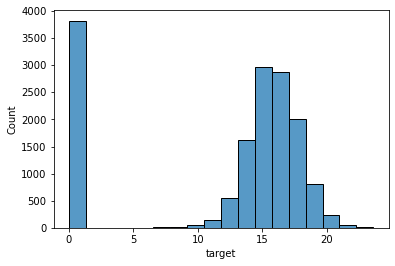

In [139]:
sns.histplot(df['target'])

C:\Users\NEUMAN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='target', ylabel='count'>

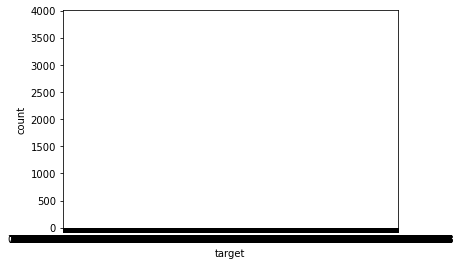

In [142]:
sns.countplot(df['target'])

In [57]:
df.loc[0]

BCT_CODBUR               44.0
CTR_MATFIS             6210.0
CTR_CATEGO_X                C
FJU_CODFJU                 99
CTR_CESSAT                  0
                    ...      
AX3_REVCAP                0.0
AX5_MNTMAR        602769328.0
RES_ANNIMP               2014
target              16.639203
id              train_id17437
Name: 0, Length: 91, dtype: object

In [61]:
# Afficher une ligne en fonction de la valeur de l'id
df.loc[df['id']=="train_id17437"]

,BCT_CODBUR,CTR_MATFIS,CTR_CATEGO_X,FJU_CODFJU,CTR_CESSAT,ACT_CODACT,CTR_OBLDIR,CTR_OBLACP,CTR_OBLRES,CTR_OBLFOP,...,TVA_CA132018,TVA_CA192018,AX1_BRTIMP,AX2_HONORA,AX2_LOYERS,AX3_REVCAP,AX5_MNTMAR,RES_ANNIMP,target,id
0,44.0,6210.0,C,99,0,3707,4,2,2,2,...,0.0,0.0,0.0,2950000.0,0.0,0.0,602769328.0,2014,16.639203,train_id17437


In [62]:
df_user=df.drop(['id'],axis=1)

In [64]:
df_user.head()

,BCT_CODBUR,CTR_MATFIS,CTR_CATEGO_X,FJU_CODFJU,CTR_CESSAT,ACT_CODACT,CTR_OBLDIR,CTR_OBLACP,CTR_OBLRES,CTR_OBLFOP,...,TVA_CA072018,TVA_CA132018,TVA_CA192018,AX1_BRTIMP,AX2_HONORA,AX2_LOYERS,AX3_REVCAP,AX5_MNTMAR,RES_ANNIMP,target
0,44.0,6210.0,C,99,0,3707,4,2,2,2,...,0.0,0.0,0.0,0.0,2950000.0,0.0,0.0,602769328.0,2014,16.639203
1,401.0,14383.0,M,22,0,6105,4,2,2,2,...,0.0,0.0,0.0,0.0,203353885.0,0.0,0.0,14785200.0,2013,17.827703
2,243.0,11555.0,M,23,0,5751,4,2,2,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10792800.0,2013,15.473503
3,72.0,6175.0,C,99,0,4402,4,2,2,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2017,0.0
4,42.0,1417.0,M,23,0,6302,4,2,2,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2014,14.286244


In [70]:
df_user.columns

Index(['BCT_CODBUR', 'CTR_MATFIS', 'CTR_CATEGO_X', 'FJU_CODFJU', 'CTR_CESSAT',
       'ACT_CODACT', 'CTR_OBLDIR', 'CTR_OBLACP', 'CTR_OBLRES', 'CTR_OBLFOP',
       'CTR_OBLTFP', 'CTR_OBLDCO', 'CTR_OBLTVA', 'CTR_OFODEC', 'CTR_OFODEP',
       'CTR_OFODET', 'CTR_OBLAUT', 'CTR_OBLASS', 'CTR_ODTIMB', 'CTR_OBLTCL',
       'CTR_OBLTHO', 'CTR_OBLDLI', 'CTR_OBLTVI', 'CTR_RATISS', 'EXE_EXERCI',
       'TVA_CHAFF6', 'TVA_CHAFF7', 'TVA_CHAF10', 'TVA_CHAF12', 'TVA_CAF125',
       'TVA_CHAF15', 'TVA_CHAF18', 'TVA_CHAF22', 'TVA_CHAF29', 'TVA_CHAF36',
       'TVA_TOTDUE', 'TVA_MOIDEB', 'TVA_CRDINI', 'TVA_BASIMB', 'TVA_DEDIMB',
       'TVA_BASEQL', 'TVA_DEDEQL', 'TVA_BASEQI', 'TVA_DEDEQI', 'TVA_BASAUL',
       'TVA_DEDAUL', 'TVA_BASAUI', 'TVA_DEDAUI', 'TVA_BASRSM', 'TVA_DEDRSM',
       'TVA_RSNRES', 'TVA_TRSPOR', 'TVA_DEDREG', 'TVA_RESTIT', 'TVA_MNTPAY',
       'TVA_MOIFIN', 'TVA_CRDFIN', 'TVA_ACHSUS', 'TVA_ACHEXO', 'TVA_ACHNDD',
       'TVA_CAFEXP', 'TVA_CAFSUS', 'TVA_CAFEXO', 'TVA_AACHAB', 'TVA_CRDBLQ

In [40]:
data['FAC_MNTPRI_C']

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
21290   NaN
21291   NaN
21292   NaN
21293   NaN
21294   NaN
Name: FAC_MNTPRI_C, Length: 21295, dtype: float64

In [144]:
df_user.corr()

""


In [145]:
from sklearn.feature_selection import SelectKBest,chi2

In [146]:
x=df_user.drop(['target'],axis=1)
y=df_user['target']

In [147]:
x['CTR_CATEGO_X'].unique()

array(['C', 'M', 'P'], dtype=object)

In [148]:
le=LabelEncoder()
x['CTR_CATEGO_X']=le.fit_transform(x['CTR_CATEGO_X'])
x['CTR_CATEGO_X']

0        0
1        1
2        1
3        0
4        1
        ..
21290    1
21291    1
21292    1
21293    1
21294    2
Name: CTR_CATEGO_X, Length: 15151, dtype: int32

In [149]:
x.columns

Index(['BCT_CODBUR', 'CTR_MATFIS', 'CTR_CATEGO_X', 'FJU_CODFJU', 'CTR_CESSAT',
       'ACT_CODACT', 'CTR_OBLDIR', 'CTR_OBLACP', 'CTR_OBLRES', 'CTR_OBLFOP',
       'CTR_OBLTFP', 'CTR_OBLDCO', 'CTR_OBLTVA', 'CTR_OFODEC', 'CTR_OFODEP',
       'CTR_OFODET', 'CTR_OBLAUT', 'CTR_OBLASS', 'CTR_ODTIMB', 'CTR_OBLTCL',
       'CTR_OBLTHO', 'CTR_OBLDLI', 'CTR_OBLTVI', 'CTR_RATISS', 'EXE_EXERCI',
       'TVA_CHAFF6', 'TVA_CHAFF7', 'TVA_CHAF10', 'TVA_CHAF12', 'TVA_CAF125',
       'TVA_CHAF15', 'TVA_CHAF18', 'TVA_CHAF22', 'TVA_CHAF29', 'TVA_CHAF36',
       'TVA_TOTDUE', 'TVA_MOIDEB', 'TVA_CRDINI', 'TVA_BASIMB', 'TVA_DEDIMB',
       'TVA_BASEQL', 'TVA_DEDEQL', 'TVA_BASEQI', 'TVA_DEDEQI', 'TVA_BASAUL',
       'TVA_DEDAUL', 'TVA_BASAUI', 'TVA_DEDAUI', 'TVA_BASRSM', 'TVA_DEDRSM',
       'TVA_RSNRES', 'TVA_TRSPOR', 'TVA_DEDREG', 'TVA_RESTIT', 'TVA_MNTPAY',
       'TVA_MOIFIN', 'TVA_CRDFIN', 'TVA_ACHSUS', 'TVA_ACHEXO', 'TVA_ACHNDD',
       'TVA_CAFEXP', 'TVA_CAFSUS', 'TVA_CAFEXO', 'TVA_AACHAB', 'TVA_CRDBLQ

In [150]:
x['BCT_CODBUR']=pd.to_numeric(x['BCT_CODBUR'])

In [151]:
for i in x:
    x[i]=pd.to_numeric(x[i])
    

In [152]:
y=pd.to_numeric(y1)

In [153]:
x.dtypes.value_counts()

float64    74
int64      14
int32       1
dtype: int64

In [154]:
y

0        16.639203
1        17.827703
2        15.473503
3         0.000000
4        14.286244
           ...    
21290    16.544842
21291    17.651115
21292    18.018778
21293    15.521108
21294    12.460719
Name: target, Length: 15151, dtype: float64

In [155]:
mutual_info_regression(x,y)
#chi2(x1,y1) Classification

array([0.08919198, 0.08955272, 0.13458882, 0.10087401, 0.00139501,
       0.16483165, 0.05199195, 0.00166916, 0.00873592, 0.00778775,
       0.0076857 , 0.0015844 , 0.00184772, 0.0128628 , 0.        ,
       0.00544689, 0.        , 0.0020529 , 0.07445655, 0.        ,
       0.00512125, 0.00841258, 0.        , 0.00473954, 0.        ,
       0.04384564, 0.00586213, 0.        , 0.02799051, 0.00324086,
       0.00567319, 0.09429934, 0.01437133, 0.00030576, 0.00084711,
       0.14097851, 0.00690027, 0.1513556 , 0.        , 0.        ,
       0.03118691, 0.03627537, 0.01159759, 0.00913907, 0.12249797,
       0.12462955, 0.03333892, 0.03867756, 0.04200614, 0.03464259,
       0.00405518, 0.        , 0.00678759, 0.02674212, 0.13015603,
       0.00354335, 0.15533   , 0.        , 0.00742535, 0.        ,
       0.02622115, 0.03756523, 0.00758852, 0.        , 0.        ,
       0.00474069, 0.00046761, 0.        , 0.00555432, 0.00199525,
       0.0025705 , 0.00263335, 0.00516838, 0.00036848, 0.00135

In [156]:
selector=SelectKBest(mutual_info_regression,k=10)
selector.fit_transform(x,y)
selector.get_support()

array([False, False,  True,  True, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False,  True, False, False, False, False, False, False,  True,
        True, False, False, False, False, False, False, False, False,
        True, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False])

###### Recursive Feature Selection

In [170]:
from sklearn.feature_selection import RFE, RFECV
from sklearn.linear_model import SGDRegressor

In [171]:
selector=RFECV(SGDRegressor(), step=10,min_features_to_select=10,cv=10)
selector.fit(x,y)
#Voir le classement final des différentes variables
rang_colonne=selector.ranking_
# Le score de SGD a chaque iteration RFECV
#selector.grid_scores_


In [172]:
rang_colonne

array([6, 6, 7, 7, 9, 6, 9, 7, 7, 7, 7, 8, 7, 8, 8, 8, 8, 8, 8, 7, 8, 9,
       8, 9, 6, 3, 5, 6, 1, 9, 4, 3, 2, 7, 9, 1, 8, 2, 4, 5, 3, 1, 1, 3,
       1, 2, 3, 3, 2, 2, 4, 6, 3, 5, 1, 7, 1, 4, 4, 4, 5, 2, 3, 5, 4, 5,
       5, 9, 3, 4, 1, 5, 6, 2, 6, 5, 1, 9, 9, 9, 3, 5, 2, 6, 4, 4, 2, 1,
       6])

In [173]:
colonnes_data=x.columns

In [174]:
df_rang_colonne=pd.DataFrame(rang_colonne)
df_rang_colonne

,0
0,6
1,6
2,7
3,7
4,9
...,...
84,4
85,4
86,2
87,1


In [175]:
df_colonnes_data=pd.DataFrame(colonnes_data)
df_colonnes_data

,0
0,BCT_CODBUR
1,CTR_MATFIS
2,CTR_CATEGO_X
3,FJU_CODFJU
4,CTR_CESSAT
...,...
84,AX2_HONORA
85,AX2_LOYERS
86,AX3_REVCAP
87,AX5_MNTMAR


In [176]:
df_concat=pd.concat([df_rang_colonne,df_colonnes_data],axis=1)
df_concat

,0,0
0,6,BCT_CODBUR
1,6,CTR_MATFIS
2,7,CTR_CATEGO_X
3,7,FJU_CODFJU
4,9,CTR_CESSAT
...,...,...
84,4,AX2_HONORA
85,4,AX2_LOYERS
86,2,AX3_REVCAP
87,1,AX5_MNTMAR


In [177]:
df_concat.columns=['Rang','colonnes']

In [178]:
df_concat

,Rang,colonnes
0,6,BCT_CODBUR
1,6,CTR_MATFIS
2,7,CTR_CATEGO_X
3,7,FJU_CODFJU
4,9,CTR_CESSAT
...,...,...
84,4,AX2_HONORA
85,4,AX2_LOYERS
86,2,AX3_REVCAP
87,1,AX5_MNTMAR


In [179]:
meilleurs_variables=df_concat.loc[df_concat['Rang']==1]

In [180]:
meilleurs_variables

,Rang,colonnes
28,1,TVA_CHAF12
35,1,TVA_TOTDUE
41,1,TVA_DEDEQL
42,1,TVA_BASEQI
44,1,TVA_BASAUL
54,1,TVA_MNTPAY
56,1,TVA_CRDFIN
70,1,TVA_MCESQ
76,1,TVA_MTDJRTVA
87,1,AX5_MNTMAR


In [188]:
liste_des_meilleurs_variables=[]
for i in meilleurs_variables['colonnes']:
   
    liste_des_meilleurs_variables.append(i)

In [189]:
liste_des_meilleurs_variables

['TVA_CHAF12',
 'TVA_TOTDUE',
 'TVA_DEDEQL',
 'TVA_BASEQI',
 'TVA_BASAUL',
 'TVA_MNTPAY',
 'TVA_CRDFIN',
 'TVA_MCESQ',
 'TVA_MTDJRTVA',
 'AX5_MNTMAR']

In [199]:
# L'ensemble des variables  utilisés pour detecter la target
x_user=x[['TVA_CHAF12',
 'TVA_TOTDUE',
 'TVA_DEDEQL',
 'TVA_BASEQI',
 'TVA_BASAUL',
 'TVA_MNTPAY',
 'TVA_CRDFIN',
 'TVA_MCESQ',
 'TVA_MTDJRTVA',
 'AX5_MNTMAR']]

In [200]:
x_user

,TVA_CHAF12,TVA_TOTDUE,TVA_DEDEQL,TVA_BASEQI,TVA_BASAUL,TVA_MNTPAY,TVA_CRDFIN,TVA_MCESQ,TVA_MTDJRTVA,AX5_MNTMAR
0,126423147.0,1.511595e+08,40671108.0,168448614.0,2.376526e+08,35416705.0,0.0,0.0,0.0,6.027693e+08
1,21916400.0,2.629968e+06,0.0,0.0,2.772366e+06,2130942.0,0.0,0.0,0.0,1.478520e+07
2,0.0,3.667230e+06,0.0,0.0,1.955256e+07,256128.0,0.0,0.0,0.0,1.079280e+07
3,0.0,6.460951e+07,0.0,0.0,3.062294e+08,318095.0,17804671.0,0.0,0.0,0.000000e+00
4,0.0,0.000000e+00,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...
21290,0.0,4.106264e+08,0.0,0.0,1.793527e+09,5748483.0,1499035.0,0.0,0.0,2.326544e+09
21291,0.0,1.985416e+08,0.0,0.0,6.292246e+08,46321401.0,13975751.0,0.0,0.0,2.505822e+08
21292,0.0,1.064191e+09,0.0,0.0,5.921346e+09,55509749.0,0.0,0.0,0.0,6.404927e+09
21293,0.0,3.852984e+06,0.0,0.0,1.705500e+07,115036.0,38436.0,0.0,0.0,3.318494e+07


In [201]:
# target àpredire 
y

0        16.639203
1        17.827703
2        15.473503
3         0.000000
4        14.286244
           ...    
21290    16.544842
21291    17.651115
21292    18.018778
21293    15.521108
21294    12.460719
Name: target, Length: 15151, dtype: float64

#### CREONS UN ECANTILLON D'ENTRAINEMENT ET DE VALIDATION

In [202]:
# Divisons notre base de données en deux parties
x_train,x_test,y_train,y_test=train_test_split(x_user,y,test_size=0.2,random_state=1)

In [203]:
x_train

,TVA_CHAF12,TVA_TOTDUE,TVA_DEDEQL,TVA_BASEQI,TVA_BASAUL,TVA_MNTPAY,TVA_CRDFIN,TVA_MCESQ,TVA_MTDJRTVA,AX5_MNTMAR
2063,0.0,1.209644e+08,8.973707e+06,0.0,6.736358e+08,6.786393e+07,60026628.0,0.0,0.0,4946169.0
4118,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,257590669.0
9754,0.0,1.847003e+08,1.584978e+07,0.0,9.523607e+08,3.916043e+06,5876833.0,0.0,0.0,393422513.0
5642,48986603.0,5.878388e+06,0.000000e+00,0.0,6.449092e+06,4.784773e+06,0.0,0.0,0.0,0.0
5007,10647549.0,3.109831e+08,0.000000e+00,0.0,7.458777e+08,0.000000e+00,41536191.0,110528936.0,0.0,65547031.0
...,...,...,...,...,...,...,...,...,...,...
1284,22935450.0,3.968388e+07,9.851180e+05,0.0,2.236966e+08,0.000000e+00,10288048.0,0.0,0.0,690562665.0
7348,0.0,3.214705e+07,0.000000e+00,0.0,1.581289e+08,2.826554e+06,12445900.0,0.0,0.0,0.0
17087,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,3038059.0,0.0,0.0,0.0
335,0.0,2.870106e+10,2.550292e+10,0.0,3.519028e+09,2.693574e+09,344372745.0,0.0,0.0,340772382.0


In [205]:
y_test

9331     19.521011
14826     0.000000
1510     15.034342
15419    16.624120
7358     15.252049
           ...    
1097     15.519405
6781     13.276373
2809     17.424641
14308     0.000000
19401    17.281065
Name: target, Length: 3031, dtype: float64

#### ENTRAINEMENT ET EVALUATION DES ALGORITMES

In [259]:
# Definissons la fonction evaluation_model
def evaluation_model(model):
    
    
    model.fit(x_train,y_train)
    
    y_pred=model.predict(x_test)
    
    print("SCORE: ",model.score(x_test,y_test))
    
    print("MAE: ",mean_absolute_error(y_test,y_pred))
    print("MSE: ",mean_squared_error(y_test,y_pred))
    

In [255]:
# Algorithmes utilisés


GradientBoostingRegressor=GradientBoostingRegressor()

RandomForestRegressor=RandomForestRegressor()
AdaBoostRegressor=AdaBoostRegressor()

In [260]:
# Nous creons un dictionnaire qui regroupe tous les algorithmes utilisés.
dict_of_models={

    
    
    'RandomForestRegressor':RandomForestRegressor,
    'AdaBoostRegressor':AdaBoostRegressor,
    
    'GradientBoostingRegressor':GradientBoostingRegressor
    
   
}

In [261]:
# Evaluation de chaque algorithme avec la fonction: evaluation_model.
for name, model  in dict_of_models.items():
    print(name)
    evaluation_model(model)

RandomForestRegressor
SCORE:  0.19628671116244978
MAE:  4.662375651184061
MSE:  40.86691428310287
AdaBoostRegressor
SCORE:  0.14971958508171668
MAE:  5.640559185203927
MSE:  43.23474218439868
GradientBoostingRegressor
SCORE:  0.23559293217198984
MAE:  4.67772406741891
MSE:  38.86828618139154


#### LE MODELE QUI ESTIME AU MIEUX  LA FRAUDE FISCALE  DANS CES TRAVAUX EST LE : GradientBoostingRegressor
###### AVEC : 
SCORE:  0.23559293217198984  soit 23,55 %

MAE:  4.67772406741891

MSE:  38.86828618139154

### Toutefois nous effectuerons des rechherches en vu d'ameliorer la performance actuelle qui n'est pas satisfesante.